# 9 Head poses Model Training

Neural Network model for a quick Head Pose estimation, using just facial points as input. The model was made for real-time control of a Pan-Tilt camera using face movements as the control signal. 

### Load dependencies, set random seed for reproducibility

In [3]:
import numpy as np
import pandas as pd
np.random.seed(14)

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

from keras.layers import Dropout 
from keras.layers.normalization import BatchNormalization 
from keras import regularizers 
from keras.layers.convolutional import Conv1D

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Using TensorFlow backend.


### Read and preprocess the dataset

In [14]:
dfCenter = pd.read_csv('datasets/face_center.csv')
dfCenter2 = pd.read_csv('datasets/face_center2.csv')
dfCenter = dfCenter.append(dfCenter2, ignore_index = True)

dfRight = pd.read_csv('datasets/face_right.csv')
dfRight2 = pd.read_csv('datasets/face_right2.csv')
dfRight = dfRight.append(dfRight2, ignore_index = True)

dfLeft = pd.read_csv('datasets/face_left.csv')
dfLeft2 = pd.read_csv('datasets/face_left2.csv')
dfLeft = dfLeft.append(dfLeft2, ignore_index = True)

dfUp = pd.read_csv('datasets/face_up.csv')
dfUp2 = pd.read_csv('datasets/face_up2.csv')
dfUp = dfUp.append(dfUp2, ignore_index = True)

dfDown = pd.read_csv('datasets/face_down.csv')
dfDown2 = pd.read_csv('datasets/face_down2.csv')
dfDown = dfDown.append(dfDown2, ignore_index = True)

dfUpRight = pd.read_csv('datasets/face_up_right.csv')
dfUpRight2 = pd.read_csv('datasets/face_up_right2.csv')
dfUpRight = dfUpRight.append(dfUpRight2, ignore_index = True)

dfUpLeft = pd.read_csv('datasets/face_up_left.csv')
dfUpLeft2 = pd.read_csv('datasets/face_up_left2.csv')
dfUpLeft = dfUpLeft.append(dfUpLeft2, ignore_index = True)

dfDownRight = pd.read_csv('datasets/face_down_right.csv')
dfDownRight2 = pd.read_csv('datasets/face_down_right2.csv')
dfDownRight = dfDownRight.append(dfDownRight2, ignore_index = True)

dfDownLeft = pd.read_csv('datasets/face_down_left.csv')
dfDownLeft2 = pd.read_csv('datasets/face_down_left2.csv')
dfDownLeft = dfDownLeft.append(dfDownLeft2, ignore_index = True)

columns = list(dfCenter)

dfCenter['RESULT'] = 0
dfRight['RESULT'] = 1
dfLeft['RESULT'] = 2
dfUp['RESULT'] = 3
dfDown['RESULT'] = 4
dfUpRight['RESULT'] = 5
dfUpLeft['RESULT'] = 6
dfDownRight['RESULT'] = 7
dfDownLeft['RESULT'] = 8


df = dfCenter.append(dfRight, ignore_index=True).append(dfLeft, ignore_index = True)
df = df.append(dfUp, ignore_index = True).append(dfDown, ignore_index = True)
df = df.append(dfUpRight, ignore_index = True).append(dfUpLeft, ignore_index = True)
df = df.append(dfDownRight, ignore_index = True).append(dfDownLeft, ignore_index = True)


print(df.shape)

(9000, 61)


In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,RESULT
0,0.858809,0.781256,0.746218,0.743311,0.764450,0.789241,0.796396,0.832012,0.838224,0.832147,...,0.142489,0.159307,0.263332,0.415602,0.364507,0.341785,0.328761,0.325338,0.340034,0
1,0.867722,0.780481,0.736402,0.718613,0.719886,0.732531,0.759472,0.798078,0.808493,0.801999,...,0.171308,0.194701,0.297484,0.429089,0.385692,0.368179,0.358008,0.349135,0.348292,0
2,0.877703,0.797423,0.736385,0.729313,0.735067,0.746128,0.776003,0.811224,0.825969,0.815212,...,0.168584,0.191605,0.289119,0.427896,0.381462,0.367352,0.360646,0.356262,0.358694,0
3,0.887809,0.795197,0.740729,0.723141,0.726975,0.736697,0.760959,0.805041,0.813587,0.811020,...,0.172387,0.202081,0.293441,0.425851,0.383749,0.367899,0.360264,0.352182,0.353588,0
4,0.896083,0.795655,0.732237,0.714301,0.714440,0.730608,0.760959,0.807052,0.813546,0.805041,...,0.169873,0.190620,0.287862,0.425851,0.372547,0.365462,0.359436,0.353214,0.346116,0


### Define input data and desired output, and then split training and test observations

In [17]:
X = df[columns]
y = df['RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=14)

X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

n_classes = 9
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print (y_test[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Define Neural Network architecture

In [24]:
model = Sequential()

# model.add(Conv1D(64, kernel_size = 3, activation='relu', input_shape=(60,1)))
# model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape=(60,)))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               7808      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Configure the model

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.00125), metrics=['accuracy'])

### Train the model

Train on 7200 samples, validate on 1800 samples
Epoch 1/70
7200/7200 [==============================] - 7s 947us/step - loss: 1.6205 - acc: 0.4879 - val_loss: 0.3314 - val_acc: 0.9344
Epoch 2/70
7200/7200 [==============================] - 3s 382us/step - loss: 0.7989 - acc: 0.7417 - val_loss: 0.2597 - val_acc: 0.9039
Epoch 3/70
7200/7200 [==============================] - 3s 375us/step - loss: 0.6036 - acc: 0.8122 - val_loss: 0.2084 - val_acc: 0.9389
Epoch 4/70
7200/7200 [==============================] - 3s 379us/step - loss: 0.5054 - acc: 0.8436 - val_loss: 0.1862 - val_acc: 0.9472
Epoch 5/70
7200/7200 [==============================] - 3s 378us/step - loss: 0.4515 - acc: 0.8653 - val_loss: 0.1691 - val_acc: 0.9561
Epoch 6/70
7200/7200 [==============================] - 3s 379us/step - loss: 0.3969 - acc: 0.8822 - val_loss: 0.1678 - val_acc: 0.9550
Epoch 7/70
7200/7200 [==============================] - 3s 382us/step - loss: 0.3750 - acc: 0.8889 - val_loss: 0.1673 - val_acc: 0.9550


7200/7200 [==============================] - 3s 351us/step - loss: 0.1218 - acc: 0.9664 - val_loss: 0.0590 - val_acc: 0.9817
Epoch 61/70
7200/7200 [==============================] - 3s 350us/step - loss: 0.1156 - acc: 0.9661 - val_loss: 0.0558 - val_acc: 0.9817
Epoch 62/70
7200/7200 [==============================] - 3s 348us/step - loss: 0.1327 - acc: 0.9632 - val_loss: 0.0645 - val_acc: 0.9833
Epoch 63/70
7200/7200 [==============================] - 3s 350us/step - loss: 0.1173 - acc: 0.9653 - val_loss: 0.0635 - val_acc: 0.9778
Epoch 64/70
7200/7200 [==============================] - 3s 349us/step - loss: 0.1184 - acc: 0.9639 - val_loss: 0.0508 - val_acc: 0.9828
Epoch 65/70
7200/7200 [==============================] - 3s 350us/step - loss: 0.1058 - acc: 0.9690 - val_loss: 0.0603 - val_acc: 0.9772
Epoch 66/70
7200/7200 [==============================] - 3s 349us/step - loss: 0.1109 - acc: 0.9674 - val_loss: 0.0833 - val_acc: 0.9722
Epoch 67/70
7200/7200 [==============================

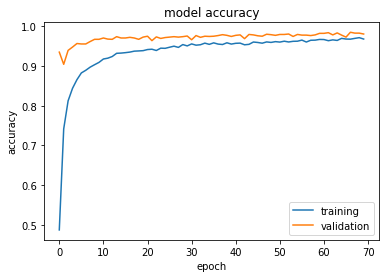

Test loss: 0.0543
Test accuracy: 0.98


In [26]:
# model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))

history = model.fit(X_train, y_train, batch_size=32, epochs=70, verbose=1, validation_data=(X_test, y_test))

loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


### Saving the model

In [14]:
model.save('model/model_9_positions.h5')